## 1. Setup Environment

In [2]:
## This is a Juptyer notebook for the Kaggle dataset:brain-tumor-detection

# %pip install -q -U keras-tuner
# %pip install torch
# %pip install torchvision

In [3]:
# import the necessary packages
import seaborn as sns
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt 
import os
import tensorflow as tf
import keras
import torch
import glob
import torchvision
import pathlib
from tqdm import tqdm


from keras.models import Sequential
from keras.layers import Dense,Conv2D

from keras.preprocessing import image
from keras.layers import MaxPooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from kerastuner import RandomSearch

import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable


from skimage.io import imread
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import warnings
warnings.filterwarnings("ignore")

C:\Users\Kai Qi Yan\AppData\Local\Temp\ipykernel_12876\3653168156.py:24: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


## 2. Problem identification

## 3. Reading data

Train images shape: (2870, 300, 300, 3)
Test images shape: (394, 300, 300, 3)


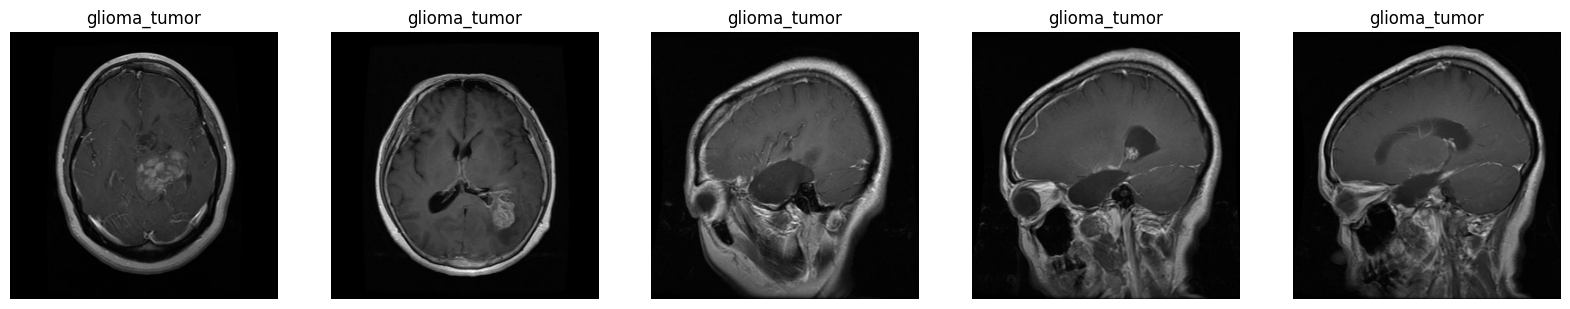

In [4]:
# Define the data path
path_train = (r'archive\Training')
path_test = (r'archive\Testing')

# Define the image size
img_size= 300

# Define the image list
train_img = []
train_labels = []
test_img = []
test_labels = []


# Load the images
for i in os.listdir(path_train):
    dir_path = os.path.join(path_train, i)  # Use os.path.join for correct path construction
    for j in os.listdir(dir_path):
        img_path = os.path.join(dir_path, j)
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, (img_size, img_size))
            train_img.append(resized_img)
            train_labels.append(i)
        else:
            print(f"Failed to load image: {img_path}")

for i in os.listdir(path_test):
    dir_path = os.path.join(path_test, i)  # Use os.path.join for correct path construction
    for j in os.listdir(dir_path):
        img_path = os.path.join(dir_path, j)
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, (img_size, img_size))
            test_img.append(resized_img)
            test_labels.append(i)
        else:
            print(f"Failed to load image: {img_path}")

# Convert the images to numpy arrays
train_img = np.array(train_img)
test_img = np.array(test_img)

# Display the shape of the images
print(f"Train images shape: {train_img.shape}")
print(f"Test images shape: {test_img.shape}")

# Display the first few images
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_img[i])
    plt.title(train_labels[i])
    plt.axis('off')


## Data Inspection

In [5]:
img_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen.fit(train_img)
img_datagen.fit(test_img)

In [6]:
# Display the shape of the images
print(f"Train images shape: {train_img.shape}")
print(f"Test images shape: {test_img.shape}")

Train images shape: (2870, 300, 300, 3)
Test images shape: (394, 300, 300, 3)


In [7]:
train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((2583, 300, 300, 3), (2583,), (287, 300, 300, 3), (287,))

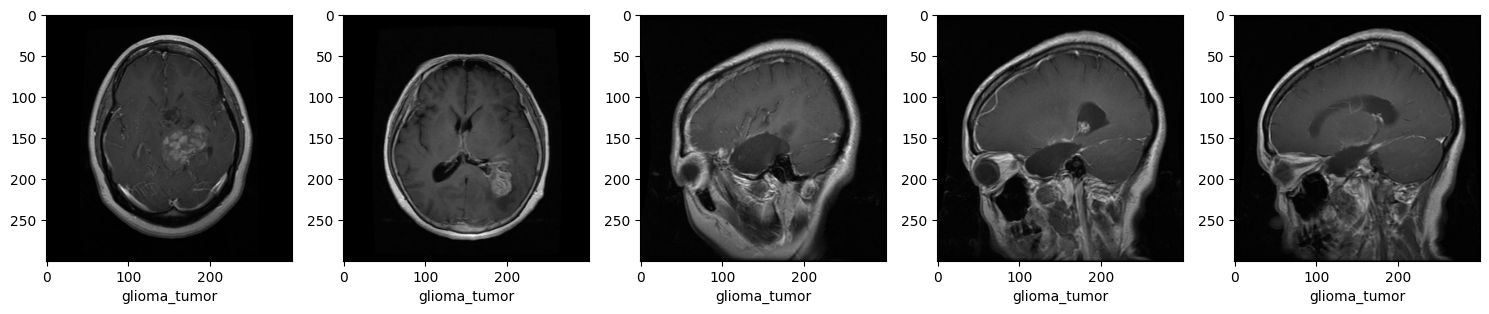

In [8]:
plt.figure(figsize = (15,15));
for i,j in enumerate(train_img):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

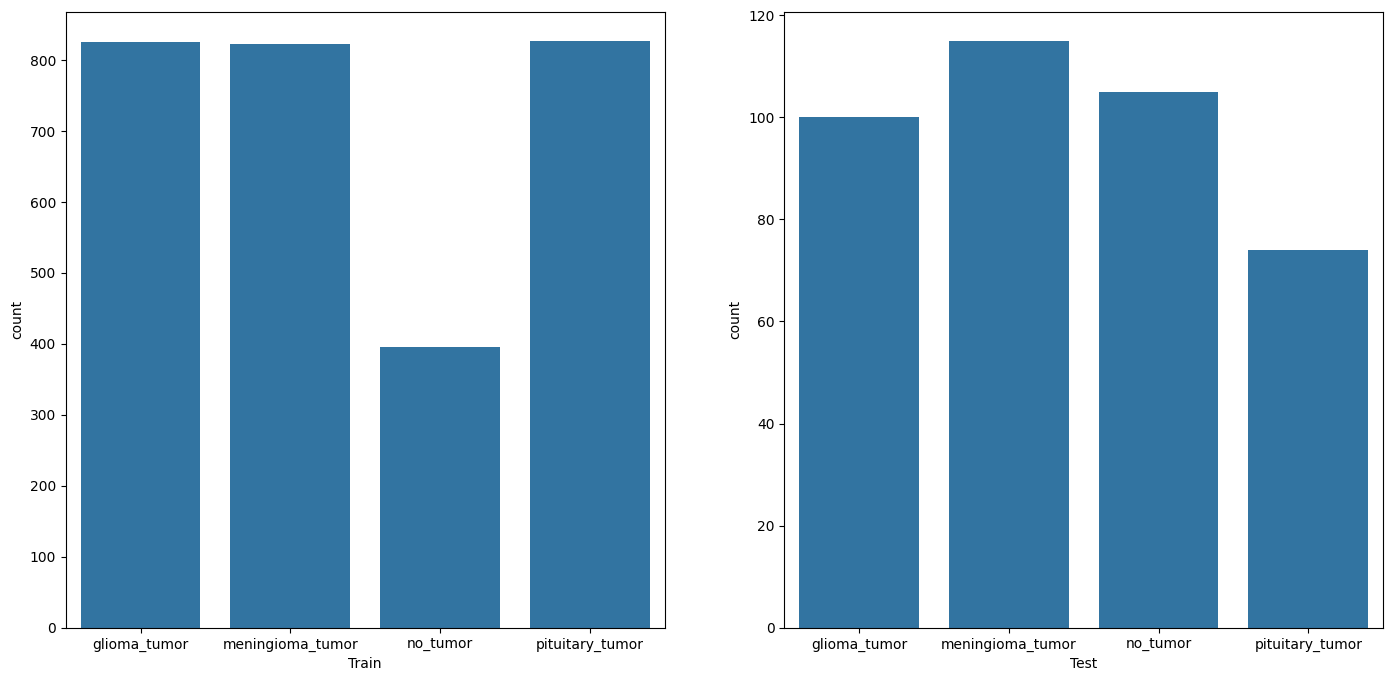

In [9]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

## 5. Feature engineering 

In [10]:
model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(5,5) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(4, activation='sigmoid')
  ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 6. Feature preprocessing

## 7. Feature selection

## 8. 1st level models

In [11]:
history = model.fit(tf.cast(train_img, tf.float32), np.array(pd.get_dummies(train_labels)), validation_split=0.1, epochs =20, verbose=1, batch_size=32)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 77s 917ms/step - accuracy: 0.4373 - loss: 8.8027 - val_accuracy: 0.2718 - val_loss: 1.3616
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 69s 855ms/step - accuracy: 0.6796 - loss: 0.7647 - val_accuracy: 0.5958 - val_loss: 0.8976
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 73s 894ms/step - accuracy: 0.7990 - loss: 0.5073 - val_accuracy: 0.6551 - val_loss: 0.7499
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 64s 790ms/step - accuracy: 0.8623 - loss: 0.3569 - val_accuracy: 0.5714 - val_loss: 0.9476
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 66s 812ms/step - accuracy: 0.9019 - loss: 0.2821 - val_accuracy: 0.5679 - val_loss: 1.1044
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 66s 807ms/step - accuracy: 0.9296 - loss: 0.2067 - val_accuracy: 0.6202 - val_loss: 1.1169
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 64s 789ms/step - accuracy: 0.9434 - loss: 0.1807 - val_accuracy: 0.6864 - val_loss: 0.9281
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 65s 797ms/step - accuracy: 0.9392 - loss: 0.1502 - val_accu

In [12]:
# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,082,830 (30.83 MB)

 Trainable params: 2,694,276 (10.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,388,554 (20.56 MB)

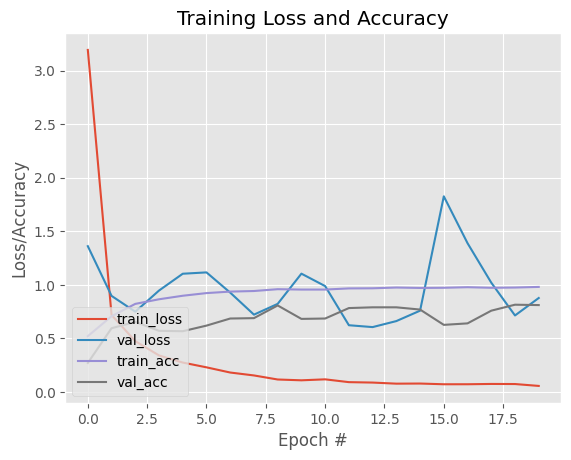

In [13]:
# plot the training loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()


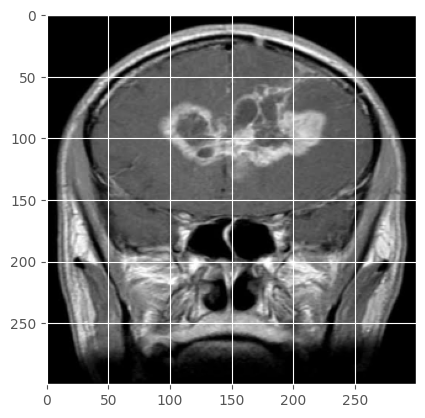

In [14]:
# Display a sample image that the model will predict as a glioma
plt.imshow(test_img[0])
plt.show()


In [15]:
train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((2583, 300, 300, 3), (2583,), (287, 300, 300, 3), (287,))

## 9. 2nd Level model

## 10. Conclusion

## 11.Future improvements